In [23]:
import pandas as pd

In [24]:
# task: data clean
# 1. The missing value from BMI can be replaced with the mean value of  its regarding gender

# Load Patient Information data
url = "https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/data_clean/data/patient_info.csv"
patient_information = pd.read_csv(url)
#print(patient_information)

# Select lines where Participant_ID is 3334466
selected_lines = patient_information[patient_information['Participant_ID'] == 3334466]
print("- - -")
print("Sample dataset for review before adding mean BMI")
print("")
print(selected_lines)

# Calculate mean BMI for each gender
mean_bmi_by_gender = patient_information.groupby('Sex')['BMI'].mean()

# Function to replace missing BMI values with mean BMI of the respective gender
def replace_missing_bmi(row):
    if pd.isna(row['BMI']):
        return mean_bmi_by_gender[row['Sex']]
    return row['BMI']

# Replace missing BMI values
patient_information['BMI'] = patient_information.apply(replace_missing_bmi, axis=1)

# ckeck if it works: Select lines where Participant_ID is 3334466
selected_lines = patient_information[patient_information['Participant_ID'] == 3334466]
print("- - -")
print("Sample dataset for review after adding mean BMI")
print("")
print(selected_lines)
print("- - -")

- - -
Sample dataset for review before adding mean BMI

      Participant_ID   Sex  Age Smoking_status  BMI  Disease
25           3334466  Male   65       Previous  NaN        1
1566         3334466  Male   65       Previous  NaN        2
- - -
Sample dataset for review after adding mean BMI

      Participant_ID   Sex  Age Smoking_status        BMI  Disease
25           3334466  Male   65       Previous  29.097902        1
1566         3334466  Male   65       Previous  29.097902        2
- - -


In [25]:
# Load Hospital Visit data
url1 = "https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/data_clean/data/date.csv"
hospital_visit = pd.read_csv(url1)
#print(hospital_visit)

# task: data clean
# 2. Do the sanity check for all the columns in 2 files, and remove the sample which does not pass the sanity check

# Sanity check for Patient Information data
patient_info_sanity_check = (
    (patient_information['Participant_ID'].astype(str).str.len() == 7) &
    (patient_information['Participant_ID'].astype(str).str.isnumeric()) &
    (patient_information['Sex'].isin(['Male', 'Female'])) &
    (patient_information['Age'].between(40, 120)) & # This research recruits volunteers who must be at least 40 years old. | The between method expects the values to be numeric
    (patient_information['BMI'].between(15, 60)) & # The between method expects the values to be numeric
    (patient_information['Smoking_status'].isin(['Never', 'Previous', 'current', 'Prefer not to answer'])) &
    (patient_information['Disease'].isin([1, 2]))
)

# Rename the Participant_ID column to Patient_ID
patient_information.rename(columns={'Participant_ID': 'Patient_ID'}, inplace=True)

# Sanity check for Hospital Visit data
hospital_visit_sanity_check = (
    (hospital_visit['Participant_ID'].astype(str).str.len() == 7) &
    (pd.to_datetime(hospital_visit['VisitDate'], format="%d/%m/%Y", errors='coerce').notnull())
)

# Rename the Participant_ID column to Patient_ID
hospital_visit.rename(columns={'Participant_ID': 'Patient_ID'}, inplace=True)


# Remove samples that do not pass the sanity check
patient_information = patient_information[patient_info_sanity_check]
hospital_visit = hospital_visit[hospital_visit_sanity_check]

# Print the filtered DataFrames
print("- - -")
print("patient_information --> checked for plausibility")
print("")
print(patient_information)
print("- - -")
print("hospital_visit --> checked for plausibility")
print("")
print(hospital_visit)
print("- - -")

- - -
patient_information --> checked for plausibility

      Patient_ID     Sex  Age Smoking_status      BMI  Disease
0        1189380  Female   52          Never  27.8159        1
1        5204198  Female   48       Previous  21.2515        2
2        5261077    Male   69       Previous  31.5537        2
3        2708891  Female   56       Previous  22.0026        2
4        1733256    Male   64       Previous  29.7959        2
...          ...     ...  ...            ...      ...      ...
2340     1630179    Male   49          Never  31.8389        2
2341     4390445  Female   68          Never  27.5468        2
2343     3004488    Male   68       Previous  27.5640        1
2344     4659389  Female   65          Never  32.1302        1
2345     1487091  Female   67       Previous  27.4302        2

[1964 rows x 6 columns]
- - -
hospital_visit --> checked for plausibility

      Patient_ID   VisitDate
0        1003300    1/7/2022
1        1003300  27/10/2021
2        1004025  19/05/2

In [26]:
# task: data clean
# 3. Calculate the number of visits of each patient, if the VisitDate is missing, means they don't visit the hospital during that period

# Calculate the number of visits for each patient
visit_count = hospital_visit.groupby('Patient_ID')['VisitDate'].count().reset_index()

# Rename the column to 'Number_of_visit'
visit_count.rename(columns={'VisitDate': 'Number_of_visit'}, inplace=True)

# Print the number of visits for each patient
print("- - -")
print("Number of visits for each patient:")
print("")
print(visit_count)
print("- - -")

- - -
Number of visits for each patient:

      Patient_ID  Number_of_visit
0        1003300                2
1        1004025                1
2        1005551                2
3        1005594                1
4        1005624                2
...          ...              ...
2128     6009769                1
2129     6011693                4
2130     6015403                1
2131     6019982                1
2132     6020094                2

[2133 rows x 2 columns]
- - -


In [27]:
# task: data clean
# 4. Merge two files with columns: Patient_ID, Sex, Age, BMI, Smoking_status, Number_of_visit, Disease

# Merge patient information and visit count data
merged_data = patient_information.merge(visit_count, on='Patient_ID', how='left')

# Select the desired columns
merged_data = merged_data[['Patient_ID', 'Sex', 'Age', 'BMI', 'Smoking_status', 'Number_of_visit', 'Disease']]

# Print the merged data
print("- - -")
print("Merged data:")
print("")
print(merged_data)
print("- - -")

# Save the merged data as a CSV file
merged_data.to_csv('merged_data.csv', index=False)

- - -
Merged data:

      Patient_ID     Sex  Age      BMI Smoking_status  Number_of_visit  \
0        1189380  Female   52  27.8159          Never              1.0   
1        5204198  Female   48  21.2515       Previous              1.0   
2        5261077    Male   69  31.5537       Previous              4.0   
3        2708891  Female   56  22.0026       Previous              1.0   
4        1733256    Male   64  29.7959       Previous              2.0   
...          ...     ...  ...      ...            ...              ...   
1959     1630179    Male   49  31.8389          Never              1.0   
1960     4390445  Female   68  27.5468          Never              1.0   
1961     3004488    Male   68  27.5640       Previous              1.0   
1962     4659389  Female   65  32.1302          Never              1.0   
1963     1487091  Female   67  27.4302       Previous              2.0   

      Disease  
0           1  
1           2  
2           2  
3           2  
4          

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

T-Statistic:  1.3213180934010642
P-Value:  0.1865493868936963


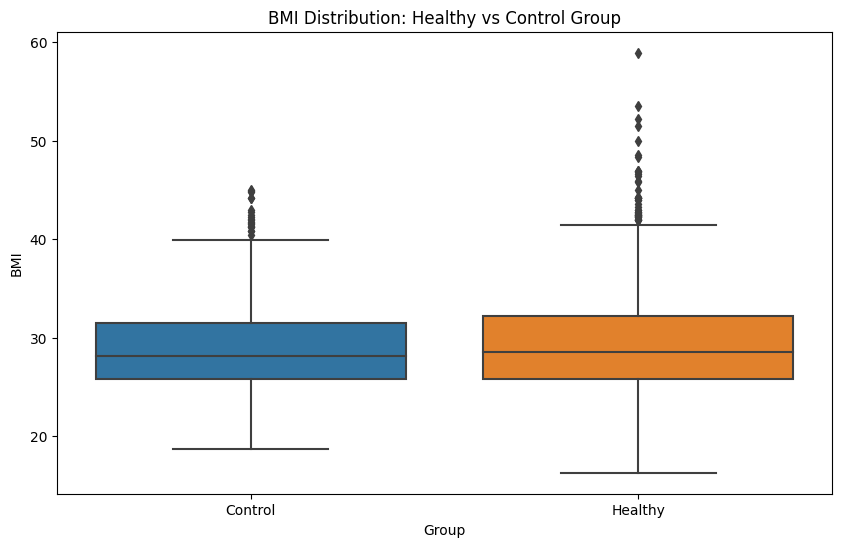

In [29]:
# task: statistics
# 1. Is the BMI different between the healthy and control group? make the box/violin chart

from scipy.stats import ttest_ind

healthy_group = merged_data[merged_data['Disease'] == 2]
control_group = merged_data[merged_data['Disease'] == 1]

t_statistic, p_value = ttest_ind(healthy_group['BMI'], control_group['BMI'])

print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Disease', y='BMI', data=merged_data)
plt.xlabel('Group')
plt.ylabel('BMI')
plt.title('BMI Distribution: Healthy vs Control Group')

# Rename x-axis tick labels
plt.xticks(ticks=[0, 1], labels=['Control', 'Healthy'])

plt.show()

In [30]:
# task: statistics
# 2. Is the proportion of Smoke status different between the healthy and control group?

from scipy.stats import chi2_contingency

# Load the patient information data

# Create a contingency table of Smoke status and Disease
contingency_table = pd.crosstab(merged_data['Smoking_status'], merged_data['Disease'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the p-value
print("Chi-Square Statistic: ", chi2)
print("P-value:", p_value)

Chi-Square Statistic:  3.272691812904698
P-value: 0.19469016014017781


In [31]:
# task: statistics
# 3. Is the smoke status related to the number of Hospital visits regardless of the disease? (ignore the "Prefer not to answer")

from scipy.stats import chi2_contingency

# Filter the merged data to include only the desired smoke statuses
smoke_statuses = ['Never', 'Previous', 'Current']
filtered_data = merged_data[merged_data['Smoking_status'].isin(smoke_statuses)]

contingency_table = pd.crosstab(filtered_data['Smoking_status'], filtered_data['Number_of_visit'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the chi-square test results
print("Chi-Square Statistic: ", chi2)
print("P-Value: ", p_value)

Chi-Square Statistic:  18.072201750441153
P-Value:  0.053757845800825425


In [32]:
# task: statistics
# 4. Is the number of visits higher in the Disease group than in the Healthy group?

# Get the number of visits for the Disease group
disease_visits = merged_data.loc[merged_data['Disease'] == 1, 'Number_of_visit'].dropna()

# Get the number of visits for the Healthy group
healthy_visits = merged_data.loc[merged_data['Disease'] == 2, 'Number_of_visit'].dropna()

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(disease_visits, healthy_visits, equal_var=False)

# Print the t-statistic and p-value
print("T-Statistic: {:.4f}".format(t_statistic))
print("P-Value: {:.4f}".format(p_value))

T-Statistic: -1.0617
P-Value: 0.2887


In [34]:
# task: statistics
# 5. Do Male has a higher current smoke percentage compared to Female?

# Load Patient Information data
url = "https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/data_clean/data/patient_info.csv"
patient_information = pd.read_csv(url)

# Create a contingency table of smoking status and sex
contingency_table = pd.crosstab(patient_information['Smoking_status'], patient_information['Sex'])
#print(contingency_table)

# Extract counts for male and female current smokers
male_current_smokers = contingency_table.loc['Current', 'Male']
female_current_smokers = contingency_table.loc['Current', 'Female']

# Calculate percentages
total_male_smokers = contingency_table['Male'].sum()
total_female_smokers = contingency_table['Female'].sum()
male_smoking_percentage = male_current_smokers / total_male_smokers * 100
female_smoking_percentage = female_current_smokers / total_female_smokers * 100

observed = [[male_current_smokers, female_current_smokers],
            [total_male_smokers - male_current_smokers, total_female_smokers - female_current_smokers]]
#print(observed)

chi2, p_value, _, _ = chi2_contingency(observed)

print("Male Current Smoking Percentage: {:.2f}%".format(male_smoking_percentage))
print("Female Current Smoking Percentage: {:.2f}%".format(female_smoking_percentage))
print("Chi-square statistic: {:.2f}".format(chi2))
print("p-value: {:.4f}".format(p_value))

Male Current Smoking Percentage: 15.69%
Female Current Smoking Percentage: 16.94%
Chi-square statistic: 0.46
p-value: 0.4958
